# Getting familar with MobileNetV2

---


In [91]:
import sys
from tensorflow.keras.applications import MobileNetV2

print(sys.executable)

print("==========================================")

input_shape = (224, 224, 3)
base_model = MobileNetV2(weights="imagenet", include_top=True, input_shape=input_shape)
base_model.summary()

j:\Work\Career\Vacations-2025\Food Classifier\.venv\Scripts\python.exe


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [92]:
for layer in base_model.layers:
    if hasattr(layer, "kernel_size"):
        print(f"{layer.name}: {layer.kernel_size}")

Conv1: (3, 3)
expanded_conv_depthwise: (3, 3)
expanded_conv_project: (1, 1)
block_1_expand: (1, 1)
block_1_depthwise: (3, 3)
block_1_project: (1, 1)
block_2_expand: (1, 1)
block_2_depthwise: (3, 3)
block_2_project: (1, 1)
block_3_expand: (1, 1)
block_3_depthwise: (3, 3)
block_3_project: (1, 1)
block_4_expand: (1, 1)
block_4_depthwise: (3, 3)
block_4_project: (1, 1)
block_5_expand: (1, 1)
block_5_depthwise: (3, 3)
block_5_project: (1, 1)
block_6_expand: (1, 1)
block_6_depthwise: (3, 3)
block_6_project: (1, 1)
block_7_expand: (1, 1)
block_7_depthwise: (3, 3)
block_7_project: (1, 1)
block_8_expand: (1, 1)
block_8_depthwise: (3, 3)
block_8_project: (1, 1)
block_9_expand: (1, 1)
block_9_depthwise: (3, 3)
block_9_project: (1, 1)
block_10_expand: (1, 1)
block_10_depthwise: (3, 3)
block_10_project: (1, 1)
block_11_expand: (1, 1)
block_11_depthwise: (3, 3)
block_11_project: (1, 1)
block_12_expand: (1, 1)
block_12_depthwise: (3, 3)
block_12_project: (1, 1)
block_13_expand: (1, 1)
block_13_depthw

In [93]:
# include_top=False removes 2 layers (global average pooling and output dense layer for predictions)
len(base_model.layers)

156

# Testing the model out without any modifications

---


In [94]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import (
    preprocess_input,
    decode_predictions,
)
import numpy as np
import matplotlib.pyplot as plt


In [95]:
image_path = "Data/Train/chocolate_cake/chocolate_cake (10).jpg"
img = image.load_img(image_path, target_size=(224, 224))

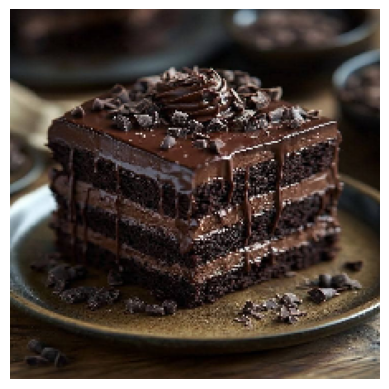

In [96]:
plt.imshow(img)
plt.axis("off")
plt.show()

In [97]:
img_ary = image.img_to_array(img)
img_ary = np.expand_dims(img_ary, axis=0)

In [98]:
preprocessed_img = preprocess_input(img_ary)
predictions = base_model.predict(preprocessed_img)
print(predictions.shape)
decoded_predictions = decode_predictions(predictions, top=5)[0]
print(decoded_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
(1, 1000)
[('n07836838', 'chocolate_sauce', np.float32(0.38838825)), ('n07613480', 'trifle', np.float32(0.30422732)), ('n02776631', 'bakery', np.float32(0.040088516)), ('n07614500', 'ice_cream', np.float32(0.022589903)), ('n04542943', 'waffle_iron', np.float32(0.01661821))]


In [99]:
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

1: chocolate_sauce (0.39)
2: trifle (0.30)
3: bakery (0.04)
4: ice_cream (0.02)
5: waffle_iron (0.02)


# Removing Top and changing minimally

---

In [100]:
input_shape = (224, 224, 3)
mobileNetV2 = MobileNetV2(
    weights="imagenet", include_top=False, input_shape=input_shape
)
print(len(mobileNetV2.layers))

154


In [101]:
mobileNetV2.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_7[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [102]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model


x = GlobalAveragePooling2D()(
    mobileNetV2.output
)  # takes it from 7x71280 to 1280, as in a 1D vector which we can feed to a Dense layer
predictions = Dense(5, activation="softmax")(x)  # 5 food classes

mobileNet_modified = Model(inputs=mobileNetV2.input, outputs=predictions)

mobileNetV2.trainable = False


In [103]:
print(len(mobileNet_modified.layers))
print(len(mobileNetV2.layers))

156
154


In [104]:
mobileNet_modified.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "Data_original/Train"
val_dir = "Data_original/Validation"


train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=batch_size, class_mode="categorical"
)

val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(224, 224), batch_size=batch_size, class_mode="categorical"
)


Found 109 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [106]:
history = mobileNet_modified.fit(
    train_generator, epochs=5, validation_data=val_generator
)

j:\Work\Career\Vacations-2025\Food Classifier\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 978ms/step - accuracy: 0.2110 - loss: 1.7376 - val_accuracy: 0.4400 - val_loss: 1.2638
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 639ms/step - accuracy: 0.5688 - loss: 1.0343 - val_accuracy: 0.7600 - val_loss: 0.8242
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 718ms/step - accuracy: 0.8716 - loss: 0.6256 - val_accuracy: 0.8800 - val_loss: 0.5435
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 696ms/step - accuracy: 0.9358 - loss: 0.3736 - val_accuracy: 0.9200 - val_loss: 0.3653
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 707ms/step - accuracy: 0.9725 - loss: 0.2347 - val_accuracy: 0.9200 - val_loss: 0.2700


# Using modified MobileNetV2 to predict

---

In [ ]:
kebab = "Data_original/Validation/biryani/biryani (5).jpg"
kebab_img = image.load_img(kebab, target_size=(224, 224))
kebab_array = image.img_to_array(kebab_img)
kebab_array = np.expand_dims(kebab_array, axis=0)
kebab_array = preprocess_input(kebab_array)

predictions = mobileNet_modified.predict(kebab_array)
predicted_class = np.argmax(predictions[0])
class_names = list(train_generator.class_indices.keys())


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step


In [108]:
print(f"Predicted class: {class_names[predicted_class]}")
print(f"Confidence: {predictions[0][predicted_class]:.4f}")

Predicted class: biryani
Confidence: 0.9519


---


---

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

Classification Report:
                precision    recall  f1-score   support

       biryani       0.00      0.00      0.00         5
  chapli_kebab       0.00      0.00      0.00         4
chocolate_cake       0.38      0.43      0.40         7
        samosa       0.00      0.00      0.00         5
   seekh_kebab       0.00      0.00      0.00         4

      accuracy                           0.12        25
     macro avg       0.07      0.09      0.08        25
  weighted avg       0.10      0.12      0.11        25



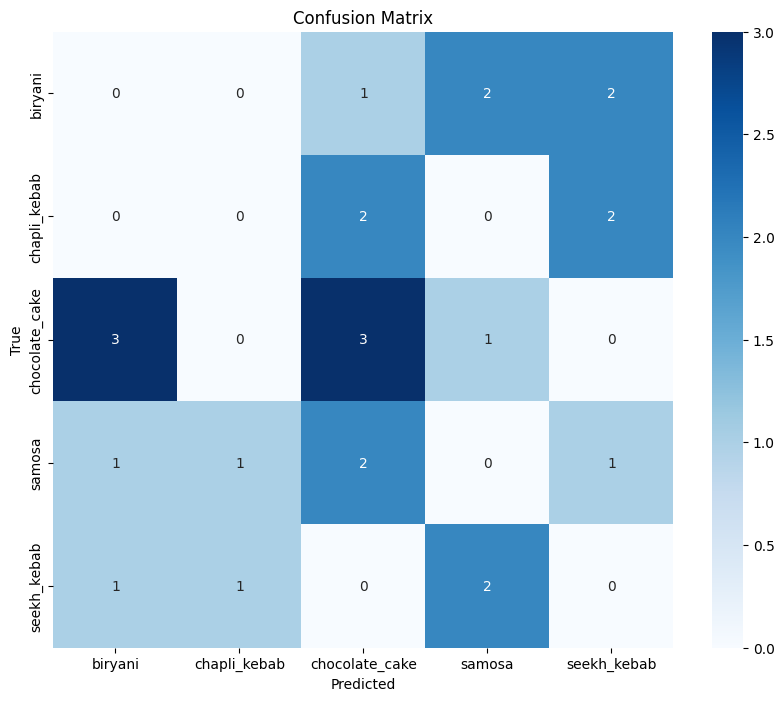

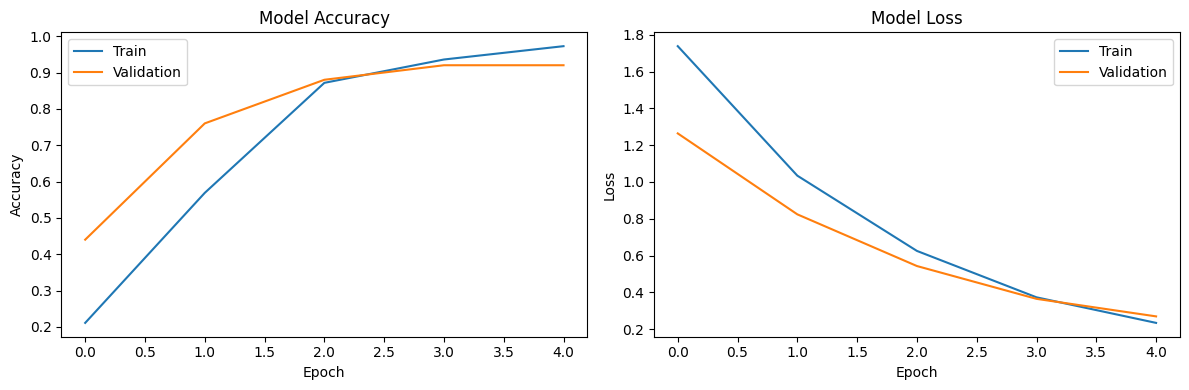

In [109]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
import seaborn as sns

val_generator.reset()
y_true = val_generator.classes
steps = int(np.ceil(val_generator.samples / val_generator.batch_size))  # Convert to int
y_pred_probs = mobileNet_modified.predict(val_generator, steps=steps)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true[: len(y_pred)], y_pred)
precision = precision_score(y_true[: len(y_pred)], y_pred, average="weighted")
recall = recall_score(y_true[: len(y_pred)], y_pred, average="weighted")
f1 = f1_score(y_true[: len(y_pred)], y_pred, average="weighted")

# For individual metrics
accuracy = accuracy_score(y_true[: len(y_pred)], y_pred)
precision = precision_score(
    y_true[: len(y_pred)], y_pred, average="weighted", zero_division=0
)
recall = recall_score(
    y_true[: len(y_pred)], y_pred, average="weighted", zero_division=0
)
f1 = f1_score(y_true[: len(y_pred)], y_pred, average="weighted", zero_division=0)

# For classification report
print("\nClassification Report:")
print(
    classification_report(
        y_true[: len(y_pred)], y_pred, target_names=class_names, zero_division=0
    )
)
# Confusion matrix
cm = confusion_matrix(y_true[: len(y_pred)], y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Learning curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.tight_layout()
plt.show()

The model is clearly overfitting, so I suppose I have 3 main options:

- add more training data
- introduce regularization
- reduce model complexity

Lets do data augmentation to increase the size of our dataset and then see how much the model overfits.

---


# Dataset Augmentation

---


### What Augmentation techniques will be used?

- rotation (20-50 degrees).
- horizontal flipping
- zoom (0.8-1.2)
- brightness adjustment (&plusmn;20%)
- contrast adjustment (&plusmn;20%)
- gaussian noise
- width and height shifts (&plusmn;10-20%)
- cutout/random erasing

---


In [110]:
# def cutout(img):
#     if np.random.random() > 0.5:
#         h, w = img.shape[:2]
#         patch_size = min(h, w) // 5
#         x = np.random.randint(0, w - patch_size)
#         y = np.random.randint(0, h - patch_size)
#         img[y : y + patch_size, x : x + patch_size, :] = 0
#     return img


# def gaussian_noise(img):
#     if np.random.random() > 0.5:
#         noisy = np.random.normal(0, 0.05, img.shape)
#         img = img + noisy


# def combined_preprocessing(img):
#     img = preprocess_input(img)
#     img = cutout(img)
#     img = gaussian_noise(img)
#     return img


augmentor = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    horizontal_flip=True,
    zoom_range=0.2,
    width_shift_range=0.15,
    height_shift_range=0.15,
    brightness_range=[0.8, 1.2],
    shear_range=0.1,
    fill_mode="nearest",
)

In [111]:
train_generator = augmentor.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode="categorical"
)

Found 109 images belonging to 5 classes.


Found 109 images belonging to 5 classes.


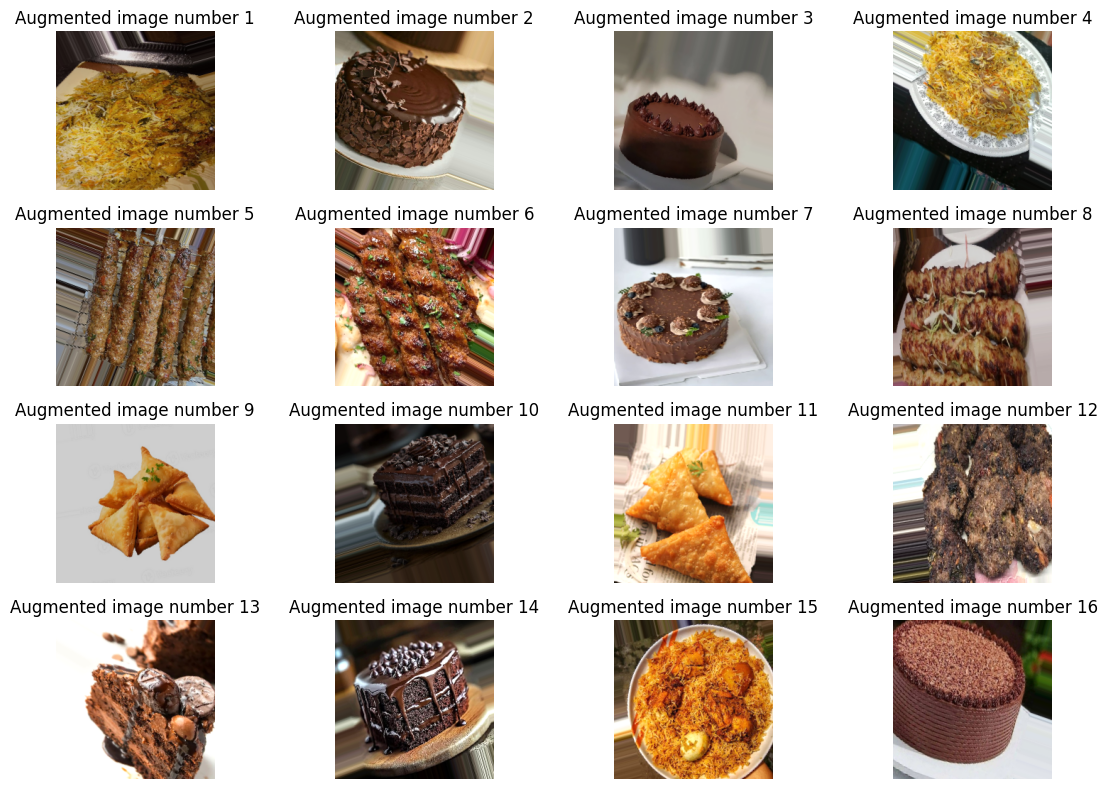

In [112]:
# actually, ganna first visualize a few of the augmented  images to see what it all looks like before training the model on them

viz_augmentor = ImageDataGenerator(
    rotation_range=30,
    horizontal_flip=True,
    zoom_range=0.2,
    width_shift_range=0.15,
    height_shift_range=0.15,
    brightness_range=[0.8, 1.2],
    shear_range=0.1,
    fill_mode="nearest",
)

viz_generator = viz_augmentor.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=16, class_mode="categorical"
)

augmented_batch = next(viz_generator)
images = augmented_batch[0]


plt.figure(figsize=(12, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i] / 255.0)
    plt.title(f"Augmented image number {i + 1}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [113]:
x = GlobalAveragePooling2D()(mobileNetV2.output)
predictions = Dense(5, activation="softmax")(x)

model_to_be_augmented = Model(inputs=mobileNetV2.input, outputs=predictions)


In [114]:
model_to_be_augmented.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [115]:
history = model_to_be_augmented.fit(
    train_generator, epochs=5, validation_data=val_generator
)

j:\Work\Career\Vacations-2025\Food Classifier\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.1927 - loss: 2.0201 - val_accuracy: 0.2800 - val_loss: 1.6291
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3853 - loss: 1.3978 - val_accuracy: 0.6000 - val_loss: 1.1344
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6239 - loss: 0.9302 - val_accuracy: 0.7600 - val_loss: 0.7521
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 938ms/step - accuracy: 0.8716 - loss: 0.6105 - val_accuracy: 0.9600 - val_loss: 0.4993
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 933ms/step - accuracy: 0.9725 - loss: 0.4395 - val_accuracy: 1.0000 - val_loss: 0.3649


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

Classification Report:
                precision    recall  f1-score   support

       biryani       0.20      0.20      0.20         5
  chapli_kebab       0.25      0.25      0.25         4
chocolate_cake       0.29      0.29      0.29         7
        samosa       0.00      0.00      0.00         5
   seekh_kebab       0.25      0.25      0.25         4

      accuracy                           0.20        25
     macro avg       0.20      0.20      0.20        25
  weighted avg       0.20      0.20      0.20        25



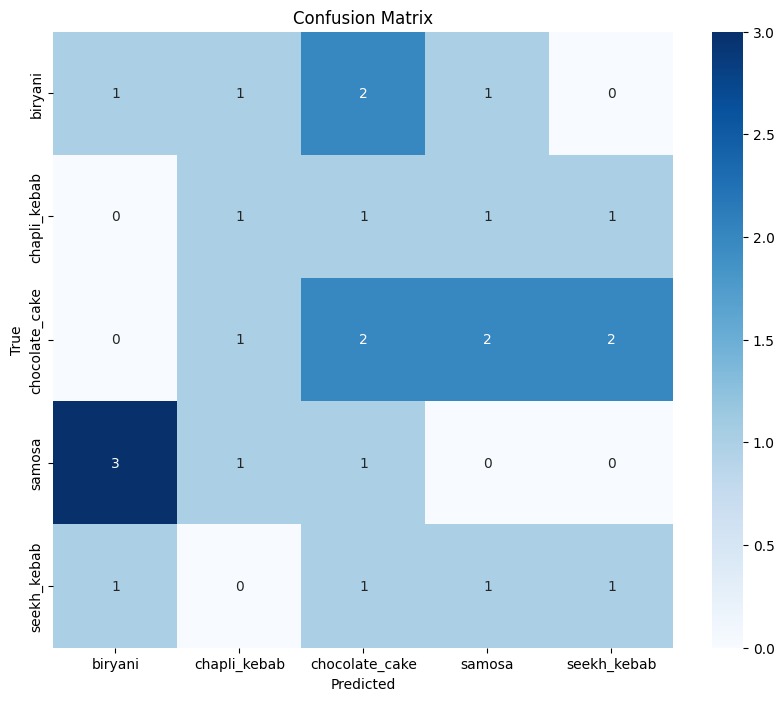

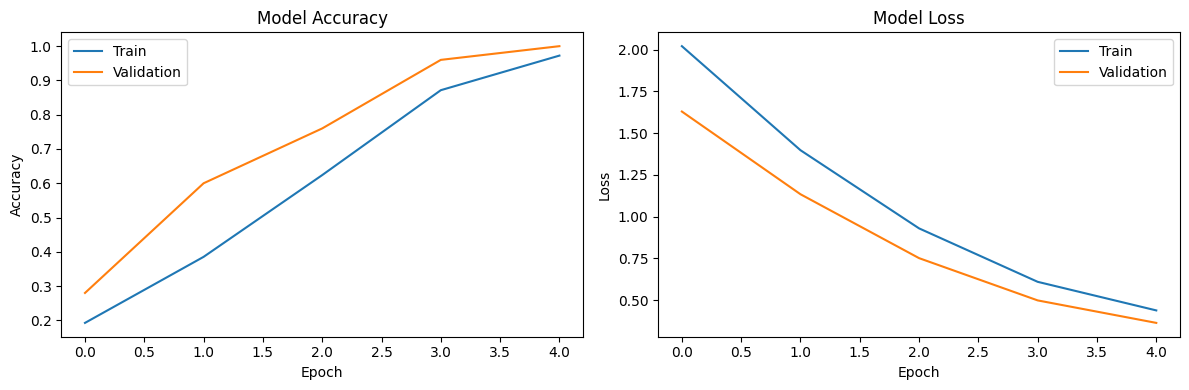

In [116]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
import seaborn as sns

val_generator.reset()
y_true = val_generator.classes
steps = int(np.ceil(val_generator.samples / val_generator.batch_size))  # Convert to int
y_pred_probs = model_to_be_augmented.predict(val_generator, steps=steps)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true[: len(y_pred)], y_pred)
precision = precision_score(y_true[: len(y_pred)], y_pred, average="weighted")
recall = recall_score(y_true[: len(y_pred)], y_pred, average="weighted")
f1 = f1_score(y_true[: len(y_pred)], y_pred, average="weighted")

# For individual metrics
accuracy = accuracy_score(y_true[: len(y_pred)], y_pred)
precision = precision_score(
    y_true[: len(y_pred)], y_pred, average="weighted", zero_division=0
)
recall = recall_score(
    y_true[: len(y_pred)], y_pred, average="weighted", zero_division=0
)
f1 = f1_score(y_true[: len(y_pred)], y_pred, average="weighted", zero_division=0)

# For classification report
print("\nClassification Report:")
print(
    classification_report(
        y_true[: len(y_pred)], y_pred, target_names=class_names, zero_division=0
    )
)
# Confusion matrix
cm = confusion_matrix(y_true[: len(y_pred)], y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Learning curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.tight_layout()
plt.show()

In [117]:
# learning a bit of pathlib

from pathlib import Path

data_dir = Path("Data")
train_dir = data_dir / "Train"
val_dir = data_dir / "Validation"

train_classes = [folder.name for folder in train_dir.iterdir() if folder.is_dir()]
print(train_classes)
val_classes = [folder.name for folder in val_dir.iterdir() if folder.is_dir()]
print(val_classes)

['biryani', 'chapli_kebab', 'chocolate_cake', 'samosa', 'seekh_kebab']
['biryani', 'chapli_kebab', 'chocolate_cake', 'samosa', 'seekh_kebab']


In [118]:
total_train_images = 0
for folder in train_dir.iterdir():
    total_train_images += len(list(folder.glob("*.jpg")))
total_train_images

109

In [119]:
img_count_by_class = {}

for folder in train_dir.iterdir():
    img_count_by_class[folder.name] = len(list(folder.glob("*.jpg")))
img_count_by_class

{'biryani': 19,
 'chapli_kebab': 19,
 'chocolate_cake': 30,
 'samosa': 22,
 'seekh_kebab': 19}

In [120]:
img_count_by_class = {}

for folder in val_dir.iterdir():
    img_count_by_class[folder.name] = len(list(folder.glob("*.jpg")))
img_count_by_class

{'biryani': 5,
 'chapli_kebab': 4,
 'chocolate_cake': 7,
 'samosa': 5,
 'seekh_kebab': 4}